In [12]:
# Elle Nguyen - CIS 3715 - Section 02
# Lab 5 - KNN

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import matplotlib.pyplot as plt
import random
random.seed(123)

df = pd.read_csv('~/Downloads/heart.csv')

In [13]:
# Task 2.1 - Preprocess the raw data

# Check whether there are missing values
print(df.isnull().sum())
print("\nThere are no missing values in this dataset.\n")

# Check whether there are categorical features
print(df.info())
print("\nThere are no categorical features in this dataset.\n")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64

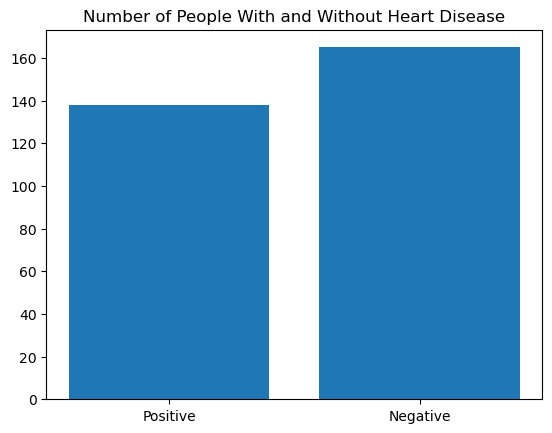

The dataset is balanced


In [14]:
# Check whether this dataset is balanced or not
# (use the bar plot to visualize the number of positive and negative samples)

# Count the number of positive and negative samples
counts = df['target'].value_counts()

# Plot the counts using a bar plot
plt.bar(counts.index, counts.values)
plt.title('Number of People With and Without Heart Disease')
plt.xticks(counts.index, ['Negative', 'Positive'])
plt.show()

print("The dataset is balanced")

In [15]:
# Task 2.2 - Split the data into 2 subsets and normalize the features of samples
heart_data = df.drop('target', axis=1).values
heart_disease = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heart_data, heart_disease, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 260, test: 43


In [16]:
# Task 2.3 - Train the KNN model and select the hyperparameter with cross-validation

# Use the 5-fold cross-validation to select the hyperparameter
# Select K from {1, 2, 3, 4, 5}
k_range = range(1, 6)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.823076923076923
{'n_neighbors': 5}


In [17]:
# Task 2.4 - Evaluate the learned model
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# Evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)

# Metrics implementation
def metrics(labels, predictions):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(labels)):
        if labels[i] == predictions[i]:
            if labels[i] == 1:
                TP += 1
            else:
                TN += 1
        else:
            if labels[i] == 1:
                FP += 1
            else:
                FN += 1
    accuracy = (TP + TN) / (TP + FP + TN + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, recall, precision, f1_score

# Report the prediction accuracy, recall, precision, and F1 score
accuracy, recall, precision, f1 = metrics(y_test, y_test_pred)

print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f}".format(accuracy, recall, precision, f1))

accuracy: 0.860, recall: 0.857, precision: 0.857, f1: 0.857
